In [1]:
import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms as T
from models.iternet import IterNet

In [2]:
netname = 'iternet'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = IterNet().to(device)

In [3]:
model.load_state_dict(torch.load('./models/weights/iternet_model_final.pth'))

<All keys matched successfully>

In [4]:
img_name = './data/valid/input/im0001.ppm'
img = Image.open(img_name)
img_gt = Image.open(img_name.replace('input', 'output'))

In [5]:
tensor2img = T.ToPILImage()
transform = []
transform.append(T.CenterCrop(512))
transform.append(T.ToTensor())
img2tensor = T.Compose(transform)

In [6]:
tensor = img2tensor(img)
tensor = tensor.view(1, tensor.shape[0], tensor.shape[1], tensor.shape[2])
tensor_gt = img2tensor(img_gt)
tensor_gt = tensor_gt.view(1, tensor_gt.shape[0], tensor_gt.shape[1], tensor_gt.shape[2])

In [7]:
y1, y2, y3, y4 = model(tensor.to(device))
y4 = y4.cpu() if device is not 'cpu' else y4

In [8]:
def show(x, gt, y):
    ximg = np.array(tensor2img(x[0]))
    gimg = np.array(tensor2img(gt[0]))
    yimg = np.array(tensor2img(y[0]))
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.imshow(ximg)
    plt.subplot(1,3,2)
    plt.imshow(gimg, cmap='gray')
    plt.subplot(1,3,3)
    plt.imshow(yimg, cmap='gray')

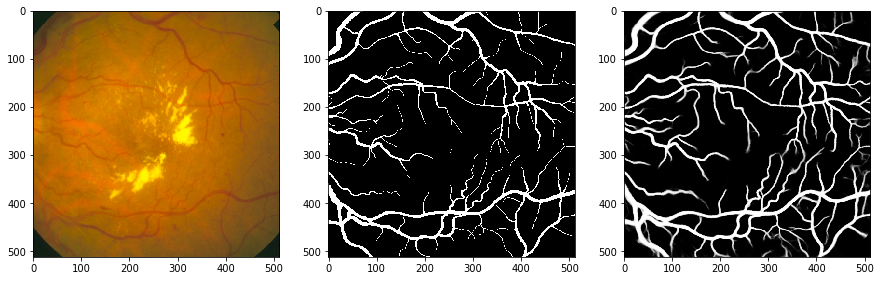

In [9]:
show(tensor, tensor_gt, y4)